In [218]:
import torch
import torch.utils.data as data
import torch.utils.data.dataset as dataset
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler


class Nav_Dataset(dataset.Dataset):
    def __init__(self):
        self.data = np.genfromtxt('saved/training_data.csv', delimiter=',')
# STUDENTS: it may be helpful for the final part to balance the distribution of your collected data

        # normalize data and save scaler for inference
        self.scaler = MinMaxScaler()
        self.normalized_data = self.scaler.fit_transform(self.data) #fits and transforms
        pickle.dump(self.scaler, open("saved/scaler.pkl", "wb")) #save to normalize at inference

    def __len__(self):
# STUDENTS: __len__() returns the length of the dataset
        return len(self.data)
        pass

    def __getitem__(self, idx):
        if not isinstance(idx, int):
            idx = idx.item()
# STUDENTS: for this example, __getitem__() must return a dict with entries {'input': x, 'label': y}
# x and y should both be of type float32. There are many other ways to do this, but to work with autograding
# please do not deviate from these specifications.
        input = torch.tensor([float(x) for x in self.normalized_data[idx][0:6]], dtype=torch.float32)
        label = torch.tensor(float(self.normalized_data[idx][6]),dtype=torch.float32)
        return {'input': input, 'label':label}

class Data_Loaders():
    def __init__(self, batch_size):
        self.nav_dataset = Nav_Dataset()
# STUDENTS: randomly split dataset into two data.DataLoaders, self.train_loader and self.test_loader
# make sure your split can handle an arbitrary number of samples in the dataset as this may vary
        total = len(self.nav_dataset)
        train_size = int(0.8 * total)
        test_size = total - train_size
        train_dataset, test_dataset = data.random_split(self.nav_dataset, [train_size, test_size])
        self.train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)



Train Epoch 001: | Loss: 0.10648 | Acc: 11.125 | Test  Epoch 001: | Loss: 0.11844 | Acc: 12.500
Train Epoch 002: | Loss: 0.10557 | Acc: 11.125 | Test  Epoch 002: | Loss: 0.11753 | Acc: 12.500
Train Epoch 003: | Loss: 0.10469 | Acc: 11.125 | Test  Epoch 003: | Loss: 0.11661 | Acc: 12.500
Train Epoch 004: | Loss: 0.10384 | Acc: 11.125 | Test  Epoch 004: | Loss: 0.11570 | Acc: 12.500
Train Epoch 005: | Loss: 0.10303 | Acc: 11.125 | Test  Epoch 005: | Loss: 0.11480 | Acc: 12.500
Train Epoch 006: | Loss: 0.10219 | Acc: 11.125 | Test  Epoch 006: | Loss: 0.11390 | Acc: 12.500
Train Epoch 007: | Loss: 0.10139 | Acc: 11.125 | Test  Epoch 007: | Loss: 0.11303 | Acc: 12.500
Train Epoch 008: | Loss: 0.10061 | Acc: 11.125 | Test  Epoch 008: | Loss: 0.11217 | Acc: 12.500
Train Epoch 009: | Loss: 0.09985 | Acc: 11.125 | Test  Epoch 009: | Loss: 0.11132 | Acc: 12.500
Train Epoch 010: | Loss: 0.09909 | Acc: 11.125 | Test  Epoch 010: | Loss: 0.11050 | Acc: 12.500
Train Epoch 011: | Loss: 0.09835 | Acc: 

Train Epoch 087: | Loss: 0.06530 | Acc: 11.125 | Test  Epoch 087: | Loss: 0.07240 | Acc: 12.500
Train Epoch 088: | Loss: 0.06501 | Acc: 11.125 | Test  Epoch 088: | Loss: 0.07205 | Acc: 12.500
Train Epoch 089: | Loss: 0.06472 | Acc: 11.125 | Test  Epoch 089: | Loss: 0.07170 | Acc: 12.500
Train Epoch 090: | Loss: 0.06442 | Acc: 11.125 | Test  Epoch 090: | Loss: 0.07135 | Acc: 12.500
Train Epoch 091: | Loss: 0.06413 | Acc: 11.125 | Test  Epoch 091: | Loss: 0.07102 | Acc: 12.500
Train Epoch 092: | Loss: 0.06384 | Acc: 11.125 | Test  Epoch 092: | Loss: 0.07068 | Acc: 12.500
Train Epoch 093: | Loss: 0.06356 | Acc: 11.125 | Test  Epoch 093: | Loss: 0.07034 | Acc: 12.500
Train Epoch 094: | Loss: 0.06328 | Acc: 11.125 | Test  Epoch 094: | Loss: 0.07003 | Acc: 12.500
Train Epoch 095: | Loss: 0.06300 | Acc: 11.125 | Test  Epoch 095: | Loss: 0.06969 | Acc: 12.500
Train Epoch 096: | Loss: 0.06272 | Acc: 11.125 | Test  Epoch 096: | Loss: 0.06936 | Acc: 12.500
Train Epoch 097: | Loss: 0.06244 | Acc: 

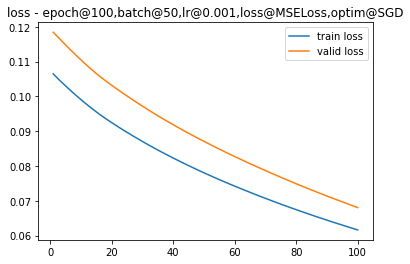

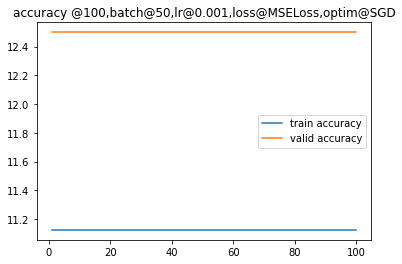

In [221]:

class Action_Conditioned_FF(nn.Module):
    def __init__(self):
        super(Action_Conditioned_FF, self).__init__()
        self.input_size = 6
        # 200 neurons in hidden layer
        self.hidden_size = 200
        # one neurn in output
        self.output_size = 1

        # Number of input features is 12.
        self.layer_1 = nn.Linear(self.input_size, self.hidden_size) 
        self.layer_2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.layer_out = nn.Linear(self.hidden_size, self.output_size) 
        
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.1)
        # self.batchnorm1 = nn.BatchNorm1d(64)
        # self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        # x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        # x = self.batchnorm2(x)
        # x = self.dropout(x)
        x = self.layer_out(x)        
        return x

    def evaluat(self, model, test_loader, loss_function):
        loss = 0
        with torch.no_grad():
            for idx, sample in enumerate(test_loader):
                input, label = sample['input'], sample['label']
                output = model(input)
                loss_data = loss_function(output, torch.reshape(label, output.size()))
                loss += loss_data.item()

        size = len(test_loader)
        if size:
            loss = loss / size
        return loss


import torch
import torch.nn as nn
import matplotlib.pyplot as plt


def train_model(no_epochs):
    model =Action_Conditioned_FF()
    batch_size = 50
    learning_rate = 0.001
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    data_loaders = Data_Loaders(batch_size)
    
    epochs=[]
    train_losses=[]
    train_accuracy=[]
    valid_losses=[]
    valid_accuracy=[]
    for e in range(1, no_epochs+1):
        model.train()
        epochs.append(e)
        epoch_loss = 0
        epoch_acc = 0
        for sample in data_loaders.train_loader:
            X_batch, y_batch = sample["input"], sample["label"]
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()

            y_pred = model(X_batch)

            loss = criterion(y_pred, y_batch.unsqueeze(1))
            acc = binary_acc(y_pred, y_batch.unsqueeze(1))

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_acc += acc.item()

        train_avg_loss = epoch_loss/len(data_loaders.train_loader)
        train_avg_acc = epoch_acc/len(data_loaders.train_loader)
        train_accuracy.append(train_avg_acc)
        train_losses.append(train_avg_loss)

        test_loss = 0
        test_acc = 0
        model.eval()
        with torch.no_grad():
            for sample in data_loaders.test_loader:
                X_batch, y_batch = sample["input"], sample["label"]
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                y_test_pred = model(X_batch)

                loss = criterion(y_test_pred, y_batch.unsqueeze(1))
                acc = binary_acc(y_test_pred, y_batch.unsqueeze(1))
                test_loss += loss.item()
                test_acc += acc.item()

        test_avg_loss = test_loss/len(data_loaders.test_loader)
        test_avg_acc =  test_acc/len(data_loaders.test_loader)
        valid_losses.append(test_avg_loss)
        valid_accuracy.append(test_avg_acc)

        #print(f'Train Epoch {e+0:03}: | Loss: {train_avg_loss:.5f} | Acc: {train_avg_acc:.3f} | Test  Epoch {e+0:03}: | Loss: {test_avg_loss:.5f} | Acc: {test_avg_acc:.3f}')

    #torch.save(model.state_dict(), "saved/saved_model.pkl", _use_new_zipfile_serialization=False)

    plt.plot(epochs,train_losses,label="train loss")
    plt.plot(epochs, valid_losses,label="valid loss")
    plt.legend()
    plt.title("loss - epoch@{},batch@{},lr@{},loss@{},optim@{}".format(no_epochs,batch_size,learning_rate,criterion.__class__.__name__,optimizer.__class__.__name__))
    plt.show()
    
    plt.plot(epochs,train_accuracy,label="train accuracy")
    plt.plot(epochs, valid_accuracy,label="valid accuracy")
    plt.legend()
    plt.title("accuracy @{},batch@{},lr@{},loss@{},optim@{}".format(no_epochs,batch_size,learning_rate,criterion.__class__.__name__,optimizer.__class__.__name__))
    plt.show()

no_epochs = 100
train_model(no_epochs)

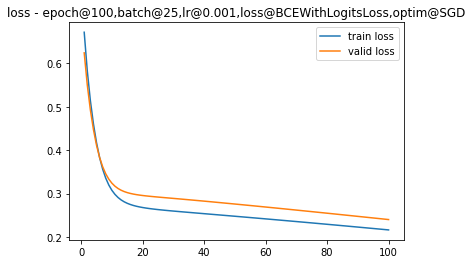

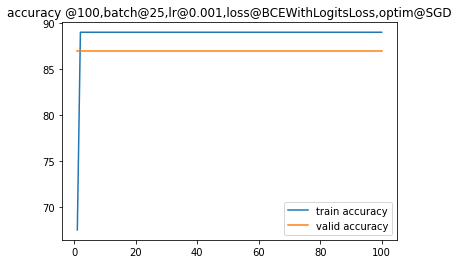

In [224]:

class Action_Conditioned_FF(nn.Module):
    def __init__(self):
        super(Action_Conditioned_FF, self).__init__()
        self.input_size = 6
        # 200 neurons in hidden layer
        self.hidden_size = 200
        # one neurn in output
        self.output_size = 1

        # Number of input features is 12.
        self.layer_1 = nn.Linear(self.input_size, self.hidden_size) 
        self.layer_2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.layer_out = nn.Linear(self.hidden_size, self.output_size) 
        
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.1)
        # self.batchnorm1 = nn.BatchNorm1d(64)
        # self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        # x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        # x = self.batchnorm2(x)
        # x = self.dropout(x)
        x = self.layer_out(x)        
        return x

    def evaluat(self, model, test_loader, loss_function):
        loss = 0
        with torch.no_grad():
            for idx, sample in enumerate(test_loader):
                input, label = sample['input'], sample['label']
                output = model(input)
                loss_data = loss_function(output, torch.reshape(label, output.size()))
                loss += loss_data.item()

        size = len(test_loader)
        if size:
            loss = loss / size
        return loss


import torch
import torch.nn as nn
import matplotlib.pyplot as plt


def train_model(no_epochs):
    model =Action_Conditioned_FF()
    batch_size = 25
    learning_rate = 0.001
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    data_loaders = Data_Loaders(batch_size)
    
    epochs=[]
    train_losses=[]
    train_accuracy=[]
    valid_losses=[]
    valid_accuracy=[]
    for e in range(1, no_epochs+1):
        model.train()
        epochs.append(e)
        epoch_loss = 0
        epoch_acc = 0
        for sample in data_loaders.train_loader:
            X_batch, y_batch = sample["input"], sample["label"]
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()

            y_pred = model(X_batch)

            loss = criterion(y_pred, y_batch.unsqueeze(1))
            acc = binary_acc(y_pred, y_batch.unsqueeze(1))

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_acc += acc.item()

        train_avg_loss = epoch_loss/len(data_loaders.train_loader)
        train_avg_acc = epoch_acc/len(data_loaders.train_loader)
        train_accuracy.append(train_avg_acc)
        train_losses.append(train_avg_loss)

        test_loss = 0
        test_acc = 0
        model.eval()
        with torch.no_grad():
            for sample in data_loaders.test_loader:
                X_batch, y_batch = sample["input"], sample["label"]
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                y_test_pred = model(X_batch)

                loss = criterion(y_test_pred, y_batch.unsqueeze(1))
                acc = binary_acc(y_test_pred, y_batch.unsqueeze(1))
                test_loss += loss.item()
                test_acc += acc.item()

        test_avg_loss = test_loss/len(data_loaders.test_loader)
        test_avg_acc =  test_acc/len(data_loaders.test_loader)
        valid_losses.append(test_avg_loss)
        valid_accuracy.append(test_avg_acc)

        #print(f'Train Epoch {e+0:03}: | Loss: {train_avg_loss:.5f} | Acc: {train_avg_acc:.3f} | Test  Epoch {e+0:03}: | Loss: {test_avg_loss:.5f} | Acc: {test_avg_acc:.3f}')

    #torch.save(model.state_dict(), "saved/saved_model.pkl", _use_new_zipfile_serialization=False)

    plt.plot(epochs,train_losses,label="train loss")
    plt.plot(epochs, valid_losses,label="valid loss")
    plt.legend()
    plt.title("loss - epoch@{},batch@{},lr@{},loss@{},optim@{}".format(no_epochs,batch_size,learning_rate,criterion.__class__.__name__,optimizer.__class__.__name__))
    plt.show()
    
    plt.plot(epochs,train_accuracy,label="train accuracy")
    plt.plot(epochs, valid_accuracy,label="valid accuracy")
    plt.legend()
    plt.title("accuracy @{},batch@{},lr@{},loss@{},optim@{}".format(no_epochs,batch_size,learning_rate,criterion.__class__.__name__,optimizer.__class__.__name__))
    plt.show()

no_epochs = 100
train_model(no_epochs)



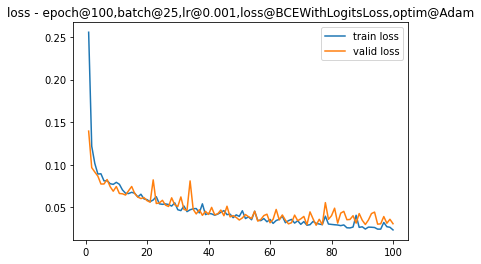

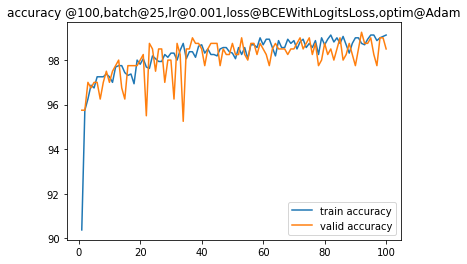

In [225]:

class Action_Conditioned_FF(nn.Module):
    def __init__(self):
        super(Action_Conditioned_FF, self).__init__()
        self.input_size = 6
        # 200 neurons in hidden layer
        self.hidden_size = 200
        # one neurn in output
        self.output_size = 1

        # Number of input features is 12.
        self.layer_1 = nn.Linear(self.input_size, self.hidden_size) 
        self.layer_2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.layer_out = nn.Linear(self.hidden_size, self.output_size) 
        
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.1)
        # self.batchnorm1 = nn.BatchNorm1d(64)
        # self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        # x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        # x = self.batchnorm2(x)
        # x = self.dropout(x)
        x = self.layer_out(x)        
        return x

    def evaluat(self, model, test_loader, loss_function):
        loss = 0
        with torch.no_grad():
            for idx, sample in enumerate(test_loader):
                input, label = sample['input'], sample['label']
                output = model(input)
                loss_data = loss_function(output, torch.reshape(label, output.size()))
                loss += loss_data.item()

        size = len(test_loader)
        if size:
            loss = loss / size
        return loss


import torch
import torch.nn as nn
import matplotlib.pyplot as plt


def train_model(no_epochs):
    model =Action_Conditioned_FF()
    batch_size = 25
    learning_rate = 0.001
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    data_loaders = Data_Loaders(batch_size)
    
    epochs=[]
    train_losses=[]
    train_accuracy=[]
    valid_losses=[]
    valid_accuracy=[]
    for e in range(1, no_epochs+1):
        model.train()
        epochs.append(e)
        epoch_loss = 0
        epoch_acc = 0
        for sample in data_loaders.train_loader:
            X_batch, y_batch = sample["input"], sample["label"]
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()

            y_pred = model(X_batch)

            loss = criterion(y_pred, y_batch.unsqueeze(1))
            acc = binary_acc(y_pred, y_batch.unsqueeze(1))

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_acc += acc.item()

        train_avg_loss = epoch_loss/len(data_loaders.train_loader)
        train_avg_acc = epoch_acc/len(data_loaders.train_loader)
        train_accuracy.append(train_avg_acc)
        train_losses.append(train_avg_loss)

        test_loss = 0
        test_acc = 0
        model.eval()
        with torch.no_grad():
            for sample in data_loaders.test_loader:
                X_batch, y_batch = sample["input"], sample["label"]
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                y_test_pred = model(X_batch)

                loss = criterion(y_test_pred, y_batch.unsqueeze(1))
                acc = binary_acc(y_test_pred, y_batch.unsqueeze(1))
                test_loss += loss.item()
                test_acc += acc.item()

        test_avg_loss = test_loss/len(data_loaders.test_loader)
        test_avg_acc =  test_acc/len(data_loaders.test_loader)
        valid_losses.append(test_avg_loss)
        valid_accuracy.append(test_avg_acc)

        #print(f'Train Epoch {e+0:03}: | Loss: {train_avg_loss:.5f} | Acc: {train_avg_acc:.3f} | Test  Epoch {e+0:03}: | Loss: {test_avg_loss:.5f} | Acc: {test_avg_acc:.3f}')

    #torch.save(model.state_dict(), "saved/saved_model.pkl", _use_new_zipfile_serialization=False)

    plt.plot(epochs,train_losses,label="train loss")
    plt.plot(epochs, valid_losses,label="valid loss")
    plt.legend()
    plt.title("loss - epoch@{},batch@{},lr@{},loss@{},optim@{}".format(no_epochs,batch_size,learning_rate,criterion.__class__.__name__,optimizer.__class__.__name__))
    plt.show()
    
    plt.plot(epochs,train_accuracy,label="train accuracy")
    plt.plot(epochs, valid_accuracy,label="valid accuracy")
    plt.legend()
    plt.title("accuracy @{},batch@{},lr@{},loss@{},optim@{}".format(no_epochs,batch_size,learning_rate,criterion.__class__.__name__,optimizer.__class__.__name__))
    plt.show()

no_epochs = 100
train_model(no_epochs)


In [42]:
import torch
import torch.nn as nn

D = 1
true = torch.tensor([0,1,0,1,1]).reshape(5,1)
print(f'true.size() = {true.size()}')

batch_size = true.size(0)
print(f'batch_size = {batch_size}')
x = torch.randn(batch_size,D)
print(f'x = {x}')
print(f'x.size() = {x.size()}')

mdl = nn.Linear(D,1)
logit = mdl(x)
_, pred = torch.max(logit.data, 1)

print(f'logit = {logit}')

print(f'pred = {pred}')
print(f'true = {true}')

print(f'true==pred = {true == pred}')
acc = (true == pred).sum().item()
print(f'acc = {acc}')

true.size() = torch.Size([5, 1])
batch_size = 5
x = tensor([[-0.1142],
        [ 0.7347],
        [ 1.3010],
        [ 0.8439],
        [ 0.9914]])
x.size() = torch.Size([5, 1])
logit = tensor([[-0.9878],
        [-0.2528],
        [ 0.2375],
        [-0.1582],
        [-0.0305]], grad_fn=<AddmmBackward>)
pred = tensor([0, 0, 0, 0, 0])
true = tensor([[0],
        [1],
        [0],
        [1],
        [1]])
true==pred = tensor([[ True,  True,  True,  True,  True],
        [False, False, False, False, False],
        [ True,  True,  True,  True,  True],
        [False, False, False, False, False],
        [False, False, False, False, False]])
acc = 10


In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [174]:
df = pd.read_csv("Dataset_spine.csv")
df.head()


Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

  Unnamed: 13  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [193]:

df = pd.read_csv("saved/training_data.csv")
df.head()

150.000000  150.000000.1  150.000000.2  150.000000.3  150.000000.4  \
0       150.0         150.0         150.0         150.0    150.000000   
1       150.0         150.0         150.0         150.0    150.000000   
2       150.0         150.0         150.0         150.0    150.000000   
3       150.0         150.0         150.0         150.0    120.045202   
4       150.0         150.0         150.0         150.0     89.580007   

   0.000000  0.000000.1  
0       0.0         0.0  
1       0.0         0.0  
2       0.0         0.0  
3       0.0         0.0  
4      -2.0         0.0

<AxesSubplot:xlabel='Class_att', ylabel='count'>

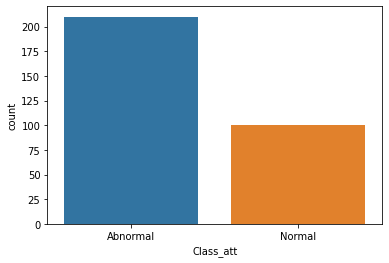

In [144]:
sns.countplot(x = 'Class_att', data=df)

In [175]:
df['Class_att'] = df['Class_att'].astype('category')
encode_map = {
    'Abnormal': 1,
    'Normal': 0
}

df['Class_att'].replace(encode_map, inplace=True)
df

Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010   
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880   
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750   
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249   

         Col7     Col8     Col9     Col10      Col11    Col12  Class_att  \
0    0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123          1   
1    0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102          1   
2    0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221          1   
3    0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329          1   
4    0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171          1   
..        ...      ...      ...       ...        ...      ...        ...   
305  0.129744   7.8433  14.7484   8.51707 -15.728927  11.5472          0   
306  0.047913  19.1986  18.1972   7.08745   6.013843  43.8693          0   
307  0.081070  16.2059  13.5565   8.89572   3.564463  18.4151          0   
308  0.159251  14.7334  16.0928   9.75922   5.767308  33.7192          0   
309  0.674504  19.3825  17.6963  13.72929   1.783007  40.6049          0   

    Unnamed: 13  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
305         NaN  
306         NaN  
307         NaN  
308         NaN  
309         NaN  

[310 rows x 14 columns]

In [176]:
X = df.iloc[:, 0:-2]
y = df.iloc[:, -2]
type(y)

pandas.core.series.Series

In [195]:

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
Name: 0.000000.1, Length: 1999, dtype: float64

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
type(y_train)

pandas.core.series.Series

In [197]:
X.shape

(1999, 6)

In [198]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(1339, 6)

In [199]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [200]:
torch.FloatTensor(X_train)

tensor([[ 5.5934e-01, -2.8511e-01, -8.1276e-01, -2.9427e-01,  5.6047e-01,
         -4.6409e-02],
        [-1.0762e+00, -1.7418e+00, -1.6376e+00, -5.4375e-01,  2.6854e-03,
          2.5428e+00],
        [ 5.5934e-01,  6.1316e-01,  6.3113e-01,  6.1205e-01,  5.6047e-01,
         -4.6409e-02],
        ...,
        [ 5.5934e-01,  6.1316e-01,  6.3113e-01,  6.1205e-01,  5.6047e-01,
         -4.6409e-02],
        [-1.4885e+00,  6.1316e-01,  6.3113e-01,  6.1205e-01, -8.7096e-01,
         -4.6409e-02],
        [ 5.5934e-01,  6.1316e-01,  6.3113e-01, -2.3163e+00, -2.9751e+00,
          9.8928e-01]])

In [205]:
torch.FloatTensor(y_train.values)

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [206]:
y_train = y_train.values

In [207]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [208]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [209]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(6, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [210]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [211]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=6, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [212]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [213]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.57995 | Acc: 73.714
Epoch 002: | Loss: 0.42488 | Acc: 89.524
Epoch 003: | Loss: 0.35959 | Acc: 91.429
Epoch 004: | Loss: 0.28938 | Acc: 94.095
Epoch 005: | Loss: 0.24028 | Acc: 95.667
Epoch 006: | Loss: 0.19957 | Acc: 95.714
Epoch 007: | Loss: 0.18058 | Acc: 96.381
Epoch 008: | Loss: 0.14200 | Acc: 97.000
Epoch 009: | Loss: 0.13152 | Acc: 97.286
Epoch 010: | Loss: 0.09972 | Acc: 97.714
Epoch 011: | Loss: 0.11538 | Acc: 97.190
Epoch 012: | Loss: 0.08888 | Acc: 97.619
Epoch 013: | Loss: 0.09988 | Acc: 96.857
Epoch 014: | Loss: 0.07778 | Acc: 97.667
Epoch 015: | Loss: 0.08637 | Acc: 97.095
Epoch 016: | Loss: 0.06825 | Acc: 97.333
Epoch 017: | Loss: 0.08510 | Acc: 97.286
Epoch 018: | Loss: 0.06423 | Acc: 97.857
Epoch 019: | Loss: 0.07878 | Acc: 97.714
Epoch 020: | Loss: 0.06110 | Acc: 98.286
Epoch 021: | Loss: 0.05644 | Acc: 97.857
Epoch 022: | Loss: 0.05591 | Acc: 98.143
Epoch 023: | Loss: 0.06253 | Acc: 97.762
Epoch 024: | Loss: 0.05076 | Acc: 98.143
Epoch 025: | Los

In [214]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [215]:
confusion_matrix(y_test, y_pred_list)

array([[587,   8],
       [  6,  59]])

In [216]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       595
         1.0       0.88      0.91      0.89        65

    accuracy                           0.98       660
   macro avg       0.94      0.95      0.94       660
weighted avg       0.98      0.98      0.98       660

